# ch 5. multiclass classification

이전 챕터에서 logistic regression을 이용한 이진 분류 모델에 대해서 알아보았습니다. 이는 기본적으로 linear model을 통해서 얻은 값에 sigmoid를 취해주어 0과 1 사이 값으로 변환합니다. 그리고 0.5보다 크면 1, 작으면 0으로 분류합니다. 이를 수식과 그림으로 나타내면 아래와 같습니다.

$$g(z)=\frac{1}{1+e^{-z}}$$

$$H(X)=\frac{1}{1+e^{-(WX+b)}}$$

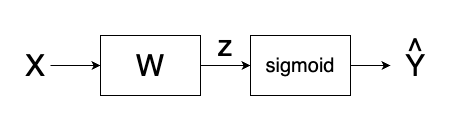

그런데 분류해야할 클래스가 여러개이면 어떻게 할까요? 가령 숫자에 대한 손글씨 이미지를 보고, 이 숫자가 0부터 9 사이 어떤 값인지 분류해야한다면 어떻게 할 수 있을까요? 이 때 사용할 수 있는 기법이 Softmax입니다.

## Multinomial Classification

분류해야하는 클래스가 3개일 때, 입력 값과 웨이트의 곱으로 각 클래스 별 확률을 계산하는 수식을 행렬 곱으로 표현하면 아래와 같습니다. 

$$\begin{pmatrix}
w_{A1}\;w_{A2}\;w_{A3} \\
w_{B1}\;w_{B2}\;w_{B3} \\
w_{C1}\;w_{C2}\;w_{C3}
\end{pmatrix} \cdot
\begin{pmatrix}
x_{1}\\
x_{2}\\
x_{3}
\end{pmatrix}=
\begin{pmatrix}
\hat{y_{A}}\\
\hat{y_{B}}\\
\hat{y_{C}}
\end{pmatrix}
$$

예측값을 하나만 출력해서 sigmoid를 거친 뒤, 0.5를 기준으로 라벨을 분류했었던 logistic regression과 달리, 이번에는 분해야하는 클래스 개수만큼 예측 값을 계산합니다. 그 결과 예를 들면 (2.0, 1.0, 0.1) 처럼 입력 데이터가 각 클래스에 속할 확률을 담은 벡터가 리턴될 것입니다. 

그런데 sigmoid 같은 함수를 적용하지 않았기 때문에, 각각의 값들이 0부터 1사이의 값들로 딱 떨어지지 않습니다. 예를 들어 (2.0, 1.0, 0.1) 보다는 (0.6590, 0.2424, 0.098) 이런 식으로 각 클래스에 속할 확률을 0과 1사이 수이고, 모두 더했을 때 1이 나오도록 보정해준다면 훨씬 편리하지 않을까요? 이 때 사용하는 것이 softmax 함수입니다.

## Softmax

$$Softmax(y_{i})=\frac{exp(y_{i})}{\sum_{j}exp(y_{j})}$$

softmax 함수를 살펴보면 각 클래스 별 예측값들의 지수승을 모든 클래스들에 대한 예측값들의 자연 지수승의 합으로 나눠준 값입니다. 즉, softmax를 취해준 다음 모든 클래스들의 예측값을 더해주면 1이 됩니다. 또한 각각의 예측값들의 범위는 0과 1 사이가 됩니다. 직접 결과를 한번 보겠습니다.

softmax를 적용한 모델의 구조를 그림으로 그려보면 아래와 같습니다. 행렬 곱을 통해서 각 클래스 별 확률을 곱해준 다음, sigmoid 대신 softmax를 취해주었습니다.

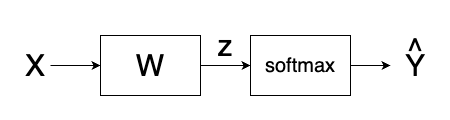

## Cross Entropy
모델의 형태가 결정되었으니, 이제 loss function을 디자인해야합니다. 앞서 logistic regression에서 사용했던 loss function은 분류해야할 클래스가 0 혹은 1, 두 개일 때에만 적용이 가능합니다. 분류해야할 클래스가 여러개인 상황에서는 Cross Entropy라는 함수를 사용해야합니다. 

cross entropy도 비슷합니다. 라벨에 해당하는 클래스에 대해선 예측값이 0일 때 loss를 크게 주고, 예측 값이 1일 때는 loss를 작게 주면 됩니다. 라벨에 해당하지 않는 클래스에 대해선 반대로 적용하면 됩니다. 하나의 입력 데이터에 대해서 cross entropy 수식을 적용하면 아래와 같습니다.

$$-\sum_{i}L_{i}log(s_{i})$$

i는 클래스의 번호를 말합니다. Li는 특정 클래스의 라벨을 말하고, si는 특정 클래스에 대한 예측값입니다. 예를들어 전체 클래스 수는 3개, 특정 입력 데이터에 대한 라벨은 2라고 가정해보겠습니다. 그러면 라벨은 아래와 같은 원 핫 벡터로 표현할 수 있습니다. 

$$L=(0, 1, 0)$$

모든 라벨에 대해서 cross entropy 수식을 풀어쓰면 아래와 같습니다.

$$0*-log(s_{0})+1*-log(s_{1})+0*-log(s_{2})$$

여기서 라벨이 0인 첫번째와 세번째 행은 무시되고, 결국 라벨이 1일 때 예측값이 어디에 가까운지에 따라서 loss가 결정됩니다. 예측 값이 1에 가깝다면 loss는 0에 가까워지고, 0에 가깝다면 loss는 무한대에 가까워집니다.

앞서 softmax를 적용했던 output 값에 cross entropy를 이용하여 loss를 계산해보겠습니다. label이 1일 때와 3일 때 loss 값을 비교해보겠습니다.

label이 0일 때 loss 계산

label이 2일 때 loss 계산

## torch를 이용한 multiclass classification 구현

이전 실습때 다뤘던 펭귄 데이터 셋을 이용해서 torch 스타일로 분류 모델을 한번 학습시켜보고, 정확도를 측정해보겠습니다.

### 데이터 셋 준비

### Convert to tensor

### Multinomial Classifier 모델 생성

### 하이퍼 파라미터 셋팅

## 정리

이번 챕터에서는 클래스가 3개 이상인 분류 모델을 학습하기 위해서 필요한 softmax와 cross entropy에 대해서 알아보았습니다. 사실 우리가 아는 대부분의 딥러닝 모델들은 이 softmax와 cross entropy를 기반으로 classification 테스크를 학습하는 모델들이기 때문에 이 두 개념을 잘 기억해두시기 바랍니다.